In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Define a function to find the roots of pi

In [20]:
def func_for_roots(x):
    a = 1.01
    b = -3.04
    c = 2.07
    return a*x**2 + b*x + c

# Check if initial bracket is valid

In [21]:
def check_initial_values(f, x_min, x_max, tol):
    
    #check init conditions
    y_min = f(x_min)
    y_max = f(x_max)
    
    #check that x_min and x_max contain a zero, or bracket a root
    if(y_min*y_max>0.0):
        print("No zero crossing found in the range: ", x_min, x_max)
        s = "f(%f) = %f, f(%f) = %f" % (x_min,y_min,x_max,y_max)
        print(s)
        return 0
    
    #if x_min is a root, then return flag == 1
    if(np.fabs(y_min)<tol):
        return 1
    
    #if x_max is a root, then return flag == 2
    if(np.fabs(y_max)<tol):
        return 2
    
    #if we reach this point we did not guess a root
    #so we have to use this valid bracket to proceed
    return 3

# Work main function

In [26]:
def bisection_root_finding(f, x_min_start, x_max_start, tol):
    
    #this function uses bisection search to find a root
    
    x_min = x_min_start #min x in bracket
    x_max = x_max_start #max x in bracket
    x_mid = 0.0 #midpoint
    
    y_min = f(x_min) #function val at x_min
    y_max = f(x_max) #func val at x_max
    y_mid = 0.0 #func val at midpoint
    
    imax = 10000 #max number of iterations
    i = 0 #iteration counter
    
    #check init vals
    flag = check_initial_values(f, x_min, x_max, tol)
    
    if(flag==0):
        print("Error in bisection_root_finding")
        raise ValueError('Initial values invalid', x_min, x_max)
    elif(flag==1):
        #lucky guess
        return x_min
    elif(flag==2):
        #another lucky guess
        return x_max
    #if we reach here, then we need to conduct the search
    
    #set a flag
    flag = 1
    
    #enter while loop
    while(flag):
        x_mid = 0.5*(x_min+x_max) #midpoint
        y_mid = f(x_mid)
        
        #check if x_mid is a root
        if(np.fabs(y_mid)<tol):
            flag = 0
        else:
            #x_mid is not a root
            
            #if the product of the function at the midpoint
            #and at one of the end points is greater than zero,
            #replace this endpoint
            if(f(x_min)*f(x_mid)>0):
                #replace x_min with x_mid
                x_min = x_mid
            else:
                #replace x_max with x_mid
                x_max = x_mid
                
        #print out the iteration
        print(x_min, f(x_min), x_max, f(x_max))
        
        #count the iteration
        i += 1
        
        #if we have exceeded the max number of iterations, exit
        if(i>=imax):
            print("Exceeded max number of iterations = ", i)
            s = "Min bracket f(%f) = %f" % (x_min,f(x_min))
            print(s)
            s = "Max bracket f(%f) = %f" % (x_max,f(x_max))
            print(s)
            s = "Mid bracket f(%f) = %f" % (x_mid,f(x_mid))
            print(s)
            raise StopIteration('Stopping iterations after ', i)
            
    #report how many iterations were completed
    print("number of iterations: ", i)
    #we are done!
    return x_mid   
    

## Perform the Search from 0 to 1.5

In [27]:
x_min = 0.0
x_max = 1.5
tolerance = 1.0e-6

#print the init guesses
print(x_min,func_for_roots(x_min))
print(x_max,func_for_roots(x_max))

x_root_1 = bisection_root_finding(func_for_roots,x_min,x_max,tolerance)
y_root_1 = func_for_roots(x_root)

s = "Root found with y(%f) = %f" % (x_root_1,y_root_1)
print(s)

0.0 2.07
1.5 -0.2175000000000007
0.75 0.3581249999999996 1.5 -0.2175000000000007
0.75 0.3581249999999996 1.125 -0.07171875000000005
0.9375 0.10769531249999975 1.125 -0.07171875000000005
1.03125 0.009111328124999485 1.125 -0.07171875000000005
1.03125 0.009111328124999485 1.078125 -0.033522949218749876
1.03125 0.009111328124999485 1.0546875 -0.012760620117187482
1.03125 0.009111328124999485 1.04296875 -0.0019633483886720704
1.037109375 0.0035393142700193003 1.04296875 -0.0019633483886720704
1.0400390625 0.0007793140411376243 1.04296875 -0.0019633483886720704
1.0400390625 0.0007793140411376243 1.04150390625 -0.0005941843986509987
1.040771484375 9.202301502186927e-05 1.04150390625 -0.0005941843986509987
1.040771484375 9.202301502186927e-05 1.0411376953125 -0.0002512161433698701
1.040771484375 9.202301502186927e-05 1.04095458984375 -7.963042706249368e-05
1.040863037109375 6.1878282573424315e-06 1.04095458984375 -7.963042706249368e-05
1.040863037109375 6.1878282573424315e-06 1.04090881347656

## Perform the search from 1.5 to 3

In [28]:
x_min = 1.5
x_max = 3.0
tolerance = 1.0e-6

#print the init guesses
print(x_min,func_for_roots(x_min))
print(x_max,func_for_roots(x_max))

x_root_2 = bisection_root_finding(func_for_roots,x_min,x_max,tolerance)
y_root_2 = func_for_roots(x_root)

s = "Root found with y(%f) = %f" % (x_root_2,y_root_2)
print(s)

1.5 -0.2175000000000007
3.0 2.0399999999999987
1.5 -0.2175000000000007 2.25 0.3431250000000001
1.875 -0.07921875000000034 2.25 0.3431250000000001
1.875 -0.07921875000000034 2.0625 0.09644531249999977
1.96875 -0.0002636718750004263 2.0625 0.09644531249999977
1.96875 -0.0002636718750004263 2.015625 0.045871582031249414
1.96875 -0.0002636718750004263 1.9921875 0.022249145507811985
1.96875 -0.0002636718750004263 1.98046875 0.01085403442382793
1.96875 -0.0002636718750004263 1.974609375 0.005260505676269123
1.96875 -0.0002636718750004263 1.9716796875 0.0024897480010981354
1.96875 -0.0002636718750004263 1.97021484375 0.001110870838165301
1.96875 -0.0002636718750004263 1.969482421875 0.0004230576753614379
1.96875 -0.0002636718750004263 1.9691162109375 7.955744862586656e-05
1.96893310546875 -9.20910760759952e-05 1.9691162109375 7.955744862586656e-05
1.969024658203125 -6.275279447631732e-06 1.9691162109375 7.955744862586656e-05
1.969024658203125 -6.275279447631732e-06 1.9690704345703125 3.663896

# Graphing our results

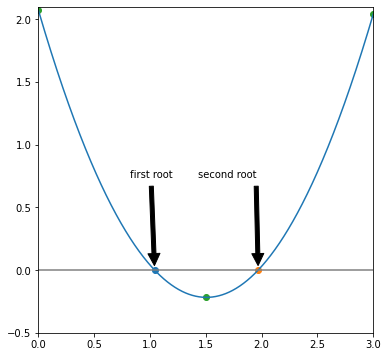

In [94]:
#create graph figure
fig = plt.figure(figsize=(6,6))

#define x
x = np.linspace(0, 3, 1000)

#limit the graph
plt.xlim([0,3])
plt.ylim([-0.5,2.1])

#create plot of f(x)
plt.plot(x, func_for_roots(x))

#plot a horizontal line @ y = 0
def zero_func(var):
    return 0*var

plt.plot(x, zero_func(x), color = 'gray')

#plot colored points at each root 
root_point_x_1 = np.array([x_root_1])
root_point_y_1 = np.array([y_root_1])
plt.scatter(root_point_x_1, root_point_y_1)

root_point_x_2 = np.array([x_root_2])
root_point_y_2 = np.array([y_root_2])
plt.scatter(root_point_x_2, root_point_y_2)

#plot colored points at each initial bracket value
bracket_points_x = np.array([0.0,1.5,3.0])
bracket_points_y = func_for_roots(bracket_points_x)
plt.scatter(bracket_points_x, bracket_points_y)


#annotate the points
plt.annotate('first root', xy=(x_root_1, 0),  xycoords='data',
            xytext=(0.4, 0.5), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )
plt.annotate('second root', xy=(x_root_2, 0),  xycoords='data',
            xytext=(0.65, 0.5), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )

plt.show()